<a href="https://colab.research.google.com/github/lobabahsaad/Data_Visualization_with_Python/blob/main/Lecture03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Library and Packages**

In [132]:
#for data analysis
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


###Read a csv file as Pandas DataFrame

In [133]:
df = pd.read_csv("/bmw.csv")

display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,57.6,2.0


###Check for missing values and data types of the column

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


**Count the number of unique values**

In [135]:
print(df["year"].unique())
print(type(df["year"].unique()))

#total number of unique columns
print(len(df["year"].unique()))

print(df["year"].value_counts())

[2014 2018 2016 2017 2015 2019 2013 2020 2002 2004 2007 2008 2011 2012
 2009 2006 2010 2003 2001 2005 2000 1999 1996 1997 1998]
<class 'numpy.ndarray'>
25
2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: year, dtype: int64


In [136]:
print(df["model"].value_counts())

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64


In [137]:
print(df["transmission"].value_counts())

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64


In [138]:
print(df["fuelType"].value_counts())

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64


###Pie Chart

We have to create the Pie Chart using Pandas library. However, editing the pie chart for better visualisation, we need to use Matplotlib. 

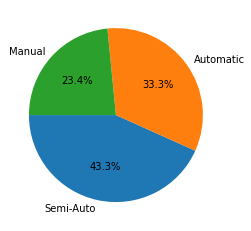

In [139]:
 df["transmission"].value_counts().plot(kind="pie", 
                                      autopct = "%1.1f%%", 
                                      startangle = 180)
 
 plt.ylabel("")
 
 #to remove extra writings and making the chart clearer
 plt.show()

**Problems with Pie Chart**

Example of Bad Visualisation

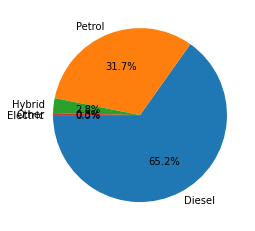

In [140]:
 df["fuelType"].value_counts().plot(kind="pie", 
                                      autopct = "%1.1f%%", 
                                      startangle = 180)
 
 plt.ylabel("")
 
 #to remove extra writings and making the chart clearer
 plt.show()

**Find the percentage of unique values present in the 'fuelType' column**

In [141]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

#Converting the series into DataFrame
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
display(df_fuelType)

print(df_fuelType.index)
print(df_fuelType.columns)

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Diesel,7027
Petrol,3417
Hybrid,298
Other,36
Electric,3


Index(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype='object')
Index(['fuelType'], dtype='object')


In [142]:
#Creating a new column of the index itself(Diesel, Petrol, etc)

df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns = {"index": "fuelType",
                                            "fuelType": "No of Cars"})

#creating a new column named "% of cars" 
#Dividing number of cars by the TOTAL number of rows which represents the total number of cars
df_fuelType["% of Cars"] = (df_fuelType["No of Cars"]/df.shape[0])*100

#rounding the percentage numbers
df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,No of Cars,% of Cars
0,Diesel,7027,65.18
1,Petrol,3417,31.69
2,Hybrid,298,2.76
3,Other,36,0.33
4,Electric,3,0.03


###Creating a Bar Plot using fuelType and Transmission column

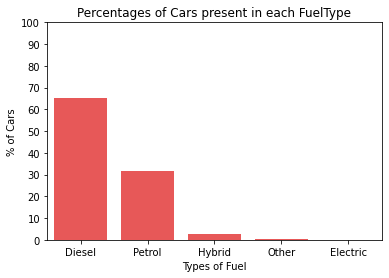

In [143]:
sns.barplot(x="fuelType", 
            y="% of Cars",
            data=df_fuelType,
            color="red",
            alpha=0.75)

plt.xlabel("Types of Fuel")
plt.ylabel("% of Cars")
plt.title("Percentages of Cars present in each FuelType")

plt.yticks(np.arange(0,101,10))
plt.show()

In [144]:
np.arange(0,101,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [146]:
#defining new DataFrame
df_transmission = pd.DataFrame(df["transmission"].value_counts())

#Creating a new column of the index itself(Diesel, Petrol, etc)
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns = {"index": "transmission",
                                            "transmission": "No of Cars"})

#creating a new column named "% of cars" 
#Dividing number of cars by the TOTAL number of rows which represents the total number of cars
df_transmission["% of Cars"] = (df_transmission["No of Cars"]/df.shape[0])*100

#rounding the percentage numbers
df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,No of Cars,% of Cars
0,Semi-Auto,4666,43.28
1,Automatic,3588,33.28
2,Manual,2527,23.44


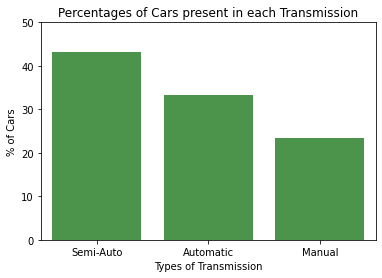

In [147]:
sns.barplot(x="transmission", 
            y="% of Cars",
            data=df_transmission,
            color="green",
            alpha=0.75)

plt.xlabel("Types of Transmission")
plt.ylabel("% of Cars")
plt.title("Percentages of Cars present in each Transmission")

plt.yticks(np.arange(0,51,10))
plt.show()